<a href="https://colab.research.google.com/github/Devbhatt910/SpamEmailClassifier/blob/main/SpamEmailClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# Install NLTK data (run this once)
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet') # For lemmatization (optional, but good to have)

# Import essential libraries
import pandas as pd
import numpy as np
import re # Regular expressions for text cleaning
import string # For punctuation

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer # For converting text to numbers
from sklearn.naive_bayes import MultinomialNB # Our chosen model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries and NLTK data loaded successfully!")

Libraries and NLTK data loaded successfully!


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### What this cell does:

This initial setup cell prepares our environment by installing necessary NLTK data and importing all the Python libraries we'll need for data handling, text processing, machine learning, and visualization.

#### How it works & Which libraries do what:

* **`nltk.download('stopwords')`, `nltk.download('punkt')`, `nltk.download('wordnet')`**: These lines download linguistic data packages from NLTK.
    * **NLTK (Natural Language Toolkit)**: A powerful library for working with human language data. We need its `stopwords` (common words to ignore), `punkt` (for tokenization), and `wordnet` (for lemmatization if used).
* **`pandas as pd`**: Imports the Pandas library, aliased as `pd`.
    * **Pandas**: Essential for data manipulation and analysis. It allows us to read our CSV file into a structured DataFrame, perform operations like column renaming, and handle data cleaning efficiently.
* **`numpy as np`**: Imports the NumPy library, aliased as `np`.
    * **NumPy**: Provides support for large, multi-dimensional arrays and matrices, along with a collection of high-level mathematical functions to operate on these arrays. Pandas often uses NumPy arrays under the hood.
* **`re`**: Imports Python's built-in regular expression module.
    * **`re`**: Used for advanced string matching and manipulation, crucial for cleaning text by removing patterns like URLs, emails, or numbers.
* **`string`**: Imports Python's built-in string module.
    * **`string`**: Provides a collection of string constants, like punctuation characters, which we use to remove punctuation from text.
* **`sklearn.model_selection.train_test_split`**: Imports a function from Scikit-learn.
    * **Scikit-learn**: A comprehensive machine learning library. `train_test_split` helps divide our dataset into separate sets for training and testing our model.
* **`sklearn.feature_extraction.text.TfidfVectorizer`**: Imports a class from Scikit-learn.
    * **`TfidfVectorizer`**: Converts raw text documents into a matrix of TF-IDF features. This transforms words into numbers that a machine learning model can understand.
* **`sklearn.naive_bayes.MultinomialNB`**: Imports a classifier from Scikit-learn.
    * **`MultinomialNB`**: The specific machine learning algorithm (Multinomial Naive Bayes) we've chosen for our spam classification task, well-suited for text data with discrete features.
* **`sklearn.metrics.*`**: Imports various functions for model evaluation.
    * **Scikit-learn (metrics)**: Provides functions like `accuracy_score`, `precision_score`, `recall_score`, `f1_score`, and `confusion_matrix` to assess how well our trained model is performing.
* **`matplotlib.pyplot as plt`**: Imports Matplotlib's plotting interface, aliased as `plt`.
    * **Matplotlib**: A fundamental plotting library for Python. Used to create static, interactive, and animated visualizations, such as charts and graphs (e.g., for the confusion matrix).
* **`seaborn as sns`**: Imports Seaborn, aliased as `sns`.
    * **Seaborn**: A high-level data visualization library based on Matplotlib. It provides a simpler interface for drawing attractive and informative statistical graphics, like heatmaps for the confusion matrix.

In [23]:
df = pd.read_csv('spam.csv', encoding='latin-1')
print('DataSet loaded')

print(df.head(5))

print(df.info())

DataSet loaded
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtyp

### What this cell does:

This cell loads our `spam.csv` file into a Pandas DataFrame and gives us a first look at its structure and content. It's the initial step of bringing our data into the Python environment.

#### How it works & Which libraries do what:

* **`pd.read_csv('spam.csv', encoding='latin-1')`**:
    * **Pandas (`pd`)**: The `read_csv` function from Pandas is used to load data from a CSV (Comma Separated Values) file. We specify `'spam.csv'` as the file name and `'latin-1'` as the `encoding` because this particular dataset often requires it to correctly interpret characters.
* **`df.head()`**:
    * **Pandas (DataFrame method)**: Displays the first 5 rows of the DataFrame (`df`). This is a quick way to inspect the data's format, column names, and initial values.
* **`df.info()`**:
    * **Pandas (DataFrame method)**: Provides a concise summary of the DataFrame, including the number of entries, column names, non-null counts (how many values are present for each column), and data types. It helps us check for missing data or unexpected data types.
* **`df['v1'].value_counts()`**:
    * **Pandas (Series method)**: Counts the unique values in the column named 'v1' (which typically contains our 'ham' or 'spam' labels). This helps us understand the distribution of our target classes and if the dataset is balanced.

In [24]:
# we want only label and message column
if df.shape[1]>2:
  df = df.iloc[:,:2]

df.columns = ['label','message']

df['label'] = df['label'].map({'ham':0,'spam':1})

print(df.head())
print()
print('Value_Counts',df['label'].value_counts())

   label                                            message
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...

Value_Counts label
0    4825
1     747
Name: count, dtype: int64


/tmp/ipython-input-24-3062794497.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['label'].map({'ham':0,'spam':1})


### What this cell does:

This cell performs initial structural cleaning of our DataFrame. It renames the generic column headers to more meaningful names (`label` and `message`) and converts the text labels (`'ham'`, `'spam'`) into numerical values (`0`, `1`) for machine learning compatibility.

#### How it works & Which libraries do what:

* **`if df.shape[1] > 2: df = df.iloc[:, :2]`**:
    * **Pandas (DataFrame attributes & methods)**: Checks if the DataFrame has more than 2 columns (often `spam.csv` has empty `Unnamed` columns). If so, `df.iloc[:, :2]` selects only the first two columns (all rows, first two columns) and creates a new DataFrame, effectively dropping the extra empty ones. `df.shape[1]` returns the number of columns.
* **`df.columns = ['label', 'message']`**:
    * **Pandas (DataFrame attribute)**: Assigns new, more descriptive names (`'label'`, `'message'`) to the columns. This makes the code more readable and intuitive.
* **`df['label'] = df['label'].map({'ham': 0, 'spam': 1})`**:
    * **Pandas (Series method)**: Applies a mapping to the 'label' column. It replaces every instance of 'ham' with `0` and every instance of 'spam' with `1`.
        * **Why?**: Machine learning models typically require numerical input, so converting categorical text labels into numbers is a necessary step.
        * **Important**: If any values in the 'label' column are neither 'ham' nor 'spam', `map` will by default insert a `NaN` (Not a Number) for those rows. This is why we might need the next diagnosis step if errors occur later.

In [25]:
# --- DIAGNOSIS: Check for NaNs in the 'label' column ---
print("\n--- Diagnosing 'Input y contains NaN' error ---")

# Check if there are any NaN values in the 'label' column after mapping
nan_labels_before_fix = df['label'].isnull().sum()
print(f"Number of NaN values in 'label' column: {nan_labels_before_fix}")

if nan_labels_before_fix > 0:
    print("Found NaN values in 'label' column. This indicates some original 'v1' values were not 'ham' or 'spam'.")
    print("Rows with NaN labels (first 5 if many):")
    print(df[df['label'].isnull()].head())

    # Optional: See what unmapped values caused NaNs in original 'v1'
    # This might print 'nan' if the original column also had missing values, or other unexpected strings.
    original_unmapped_values = df[df['label'].isnull()]['v1'].unique()
    print(f"Original 'v1' values that caused NaNs in 'label': {original_unmapped_values}")

    print("\n--- Fixing: Dropping rows with NaN labels ---")
    # Drop rows where 'label' is NaN
    df.dropna(subset=['label'], inplace=True)
    print(f"DataFrame shape after dropping NaNs: {df.shape}")
    print("NaN values in 'label' column after fix:", df['label'].isnull().sum())
else:
    print("No NaN values found in 'label' column. Proceeding as planned.")

print("\n--- Diagnosis and potential fix complete. Re-running subsequent steps is recommended. ---")


--- Diagnosing 'Input y contains NaN' error ---
Number of NaN values in 'label' column: 0
No NaN values found in 'label' column. Proceeding as planned.

--- Diagnosis and potential fix complete. Re-running subsequent steps is recommended. ---


### What this cell does:

This crucial debugging cell checks for and handles any missing (NaN) values that might have appeared in the `label` column after we tried to map 'ham' and 'spam' to 0 and 1. This is a common issue that causes errors in machine learning models.

#### How it works & Which libraries do what:

* **`df['label'].isnull().sum()`**:
    * **Pandas (Series methods)**: `isnull()` checks each value in the 'label' column and returns `True` if it's `NaN`, `False` otherwise. `.sum()` then counts how many `True` values (i.e., `NaN`s) there are.
* **`df[df['label'].isnull()].head()`**:
    * **Pandas (Boolean indexing)**: If `NaN`s are found, this line filters the DataFrame to show only the rows where the 'label' column is `NaN`. This helps us inspect what kind of data led to the `NaN`s.
* **`df.dropna(subset=['label'], inplace=True)`**:
    * **Pandas (DataFrame method)**: This is the fix. `dropna()` is used to remove rows containing `NaN` values.
        * `subset=['label']`: Specifies that we only care about `NaN`s in the 'label' column. Rows with `NaN`s in other columns will not be dropped by this specific command.
        * `inplace=True`: Modifies the DataFrame `df` directly, without needing to assign the result back to `df`.
    * **Why?**: Machine learning models cannot process `NaN` values in the target variable (`y`). Removing these problematic rows ensures our data is clean for the model.

In [26]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Initialize stemmer and stop words
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # 1. lower case
    text = text.lower()

    # 2. Remove/Normalize URLs
    text = re.sub(r'http\S+|www\S+|https\S+', ' url ', text)

    # 3. Remove/Normalize Email Addresses
    text = re.sub(r'\S*@\S*\s?', ' emailaddr ', text)

    # 4. Remove/Normalize Numbers
    text = re.sub(r'\d+', ' number ', text)

    # 5. Remove Punctuation (keep spaces)
    text = text.translate(str.maketrans('', '', string.punctuation))

    # 6. Tokenization (split into words)
    words = text.split()

    # 7. Remove Stop Words and apply Stemming
    words = [stemmer.stem(word) for word in words if word not in stop_words and word.strip() != '']

    # Join words back into a single string
    text = ' '.join(words)
    return text

# Apply the preprocessing function to the 'message' column
df['cleaned_message'] = df['message'].apply(preprocess_text)

print("\nOriginal vs. Cleaned Message Examples:")
for i in range(5):
    print(f"Original: {df['message'].iloc[i]}")
    print(f"Cleaned:  {df['cleaned_message'].iloc[i]}\n")

print("\nFirst 5 rows with cleaned messages:")
print(df.head())


Original vs. Cleaned Message Examples:
Original: Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Cleaned:  go jurong point crazi avail bugi n great world la e buffet cine got amor wat

Original: Ok lar... Joking wif u oni...
Cleaned:  ok lar joke wif u oni

Original: Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
Cleaned:  free entri number wkli comp win fa cup final tkt number st may number text fa number receiv entri questionstd txt ratetc appli number number

Original: U dun say so early hor... U c already then say...
Cleaned:  u dun say earli hor u c alreadi say

Original: Nah I don't think he goes to usf, he lives around here though
Cleaned:  nah dont think goe usf live around though


First 5 rows with cleaned messages:
   label                                            message  \
0      0  Go until jurong p

### What this cell does:

This cell defines and applies a comprehensive text preprocessing function to clean up the raw email messages. This transforms messy, inconsistent text into a standardized format that's more suitable for machine learning.

#### How it works & Which libraries do what:

* **`from nltk.corpus import stopwords`**, **`from nltk.stem import PorterStemmer`**:
    * **NLTK**: Imports `stopwords` (a list of common words like "the", "is") and `PorterStemmer` (a basic algorithm to reduce words to their root form).
* **`stemmer = PorterStemmer()`**, **`stop_words = set(stopwords.words('english'))`**: Initializes the stemmer object and loads English stop words into a `set` (for fast lookup).
* **`def preprocess_text(text):`**: Defines a Python function that takes a raw text string as input and performs a series of cleaning steps:
    * **`text.lower()`**: Converts all text to lowercase.
        * **Why?**: Treats "Spam" and "spam" as the same word, reducing vocabulary size and improving consistency.
    * **`re.sub(r'http\S+|www\S+|https\S+', ' url ', text)`**:
        * **`re` (Regular Expressions)**: Uses regular expressions to find patterns for URLs (`http...`, `www...`, `https...`) and replaces them with a generic token `' url '`.
        * **Why?**: Specific URLs are usually not important for spam detection; their presence is. Normalizing them prevents the model from memorizing specific links.
    * **`re.sub(r'\S*@\S*\s?', ' emailaddr ', text)`**: Similarly, replaces email addresses with `' emailaddr '`.
    * **`re.sub(r'\d+', ' number ', text)`**: Replaces sequences of digits (numbers) with `' number '`.
    * **`text.translate(str.maketrans('', '', string.punctuation))`**:
        * **`string`**: Removes all punctuation characters (like '.', '!', '?') from the text.
        * **Why?**: Punctuation generally doesn't contribute much to the meaning for spam detection.
    * **`words = text.split()`**: Breaks the cleaned text into individual words (tokens).
    * **`[stemmer.stem(word) for word in words if word not in stop_words and word.strip() != '']`**: This is a list comprehension that:
        * Iterates through each `word`.
        * Checks `if word not in stop_words`: Removes common, less informative words.
        * Checks `and word.strip() != ''`: Removes any empty strings that might result from cleaning.
        * **`stemmer.stem(word)`**: Applies stemming, reducing words like "running", "ran", "runs" to their base form "run".
        * **Why?**: Reduces the total number of unique words, helping the model generalize better by treating variations of the same word as identical.
    * **`' '.join(words)`**: Joins the processed words back into a single string, separated by spaces.
* **`df['cleaned_message'] = df['message'].apply(preprocess_text)`**:
    * **Pandas (Series method)**: Applies the `preprocess_text` function to every message in the original 'message' column and saves the results in a new column called 'cleaned_message'.

In [27]:
# Initialize TF-IDF Vectorizer
# max_features: Limits the number of unique words (features) to consider.
#               This helps in managing computational resources and sometimes prevents overfitting.
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the cleaned messages
# .fit_transform() learns the vocabulary from the training data and then transforms the text into TF-IDF vectors.
X = tfidf_vectorizer.fit_transform(df['cleaned_message']).toarray()

# Get the target variable (labels)
y = df['label']

print(f"Shape of our feature matrix (X): {X.shape}")
print(f"Number of emails: {X.shape[0]}")
print(f"Number of features (unique words with TF-IDF scores): {X.shape[1]}")

print("\nFirst 5 rows of the TF-IDF feature matrix (X):")
print(X[:5, :10]) # Displaying first 5 rows and first 10 columns for brevity

Shape of our feature matrix (X): (5572, 5000)
Number of emails: 5572
Number of features (unique words with TF-IDF scores): 5000

First 5 rows of the TF-IDF feature matrix (X):
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### What this cell does:

This cell transforms our clean text messages into numerical features using the TF-IDF (Term Frequency-Inverse Document Frequency) technique. This is how we convert human-readable text into a format that a machine learning model can process.

#### How it works & Which libraries do what:

* **`tfidf_vectorizer = TfidfVectorizer(max_features=5000)`**:
    * **Scikit-learn (`TfidfVectorizer`)**: Creates an instance of the TF-IDF vectorizer.
        * **`max_features=5000`**: This important parameter limits the vocabulary size. It means the vectorizer will only consider the 5000 words that have the highest TF-IDF scores across the entire dataset. This helps manage computational resources and can prevent overfitting.
* **`X = tfidf_vectorizer.fit_transform(df['cleaned_message']).toarray()`**:
    * **Scikit-learn (`TfidfVectorizer` methods)**:
        * **`.fit_transform(df['cleaned_message'])`**: This method first `fits` the vectorizer to our data (learns all the unique words, their frequencies, and how common they are across all documents). Then, it `transforms` each `cleaned_message` into a numerical vector, where each number represents the TF-IDF score of a particular word in that message.
        * **`.toarray()`**: `fit_transform` often returns a sparse matrix (efficient for text with many zeros). `.toarray()` converts this into a dense NumPy array, which is easier for many Scikit-learn models to work with.
    * **NumPy**: The resulting `X` is a NumPy array representing our feature matrix. Each row is an email, and each column is a word (feature) with its TF-IDF score.
* **`y = df['label']`**:
    * **Pandas (Series assignment)**: Simply assigns the 'label' column (our numerical spam/ham labels) to the variable `y`. This is our target variable that the model will learn to predict.

In [28]:
# Split the data into training and testing sets
# X: our features (TF-IDF vectors)
# y: our labels (0 for ham, 1 for spam)
# test_size=0.20: 20% of the data will be used for testing, 80% for training
# random_state=42: Ensures reproducibility. If you run this code again, you'll get the exact same split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(f"Shape of X_train (training features): {X_train.shape}")
print(f"Shape of X_test (testing features): {X_test.shape}")
print(f"Shape of y_train (training labels): {y_train.shape}")
print(f"Shape of y_test (testing labels): {y_test.shape}")

print("\nData splitting complete!")

Shape of X_train (training features): (4457, 5000)
Shape of X_test (testing features): (1115, 5000)
Shape of y_train (training labels): (4457,)
Shape of y_test (testing labels): (1115,)

Data splitting complete!


### What this cell does:

This cell divides our entire dataset (`X` and `y`) into two distinct parts: a training set and a testing set. This is a fundamental step in machine learning to ensure proper model evaluation.

#### How it works & Which libraries do what:

* **`from sklearn.model_selection import train_test_split`**:
    * **Scikit-learn (`train_test_split`)**: Imports the function specifically designed for splitting datasets.
* **`X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)`**:
    * **`train_test_split`**: This function performs the actual split.
        * `X`: Our feature matrix (TF-IDF vectors).
        * `y`: Our target labels (0 for ham, 1 for spam).
        * `test_size=0.20`: Specifies that 20% of the data will be held back for testing, meaning 80% will be used for training.
        * `random_state=42`: This is a "seed" for the random number generator. By setting it to a fixed number (like 42), we ensure that the split is exactly the same every time we run the code. This makes our results reproducible.
    * **Output**: The function returns four separate arrays:
        * `X_train`: Features for training.
        * `X_test`: Features for testing.
        * `y_train`: Labels corresponding to `X_train`.
        * `y_test`: Labels corresponding to `X_test`.
* **`print(f"Shape of ...")`**:
    * **NumPy (Array attribute)**: The `.shape` attribute of a NumPy array (which `X_train`, `X_test`, `y_train`, `y_test` are) returns a tuple indicating its dimensions. Printing these helps confirm that our data has been split correctly.

In [29]:
# Initialize the Multinomial Naive Bayes model
model = MultinomialNB()

# Train the model using the training data
# The .fit() method "teaches" the model to find patterns between features (X_train) and labels (y_train).
model.fit(X_train, y_train)

print("Multinomial Naive Bayes model trained successfully!")

Multinomial Naive Bayes model trained successfully!


### What this cell does:

This cell initializes our chosen machine learning model, the Multinomial Naive Bayes classifier, and then "trains" it using our prepared training data. This is where the model learns to identify patterns between the email features and their spam/ham labels.

#### How it works & Which libraries do what:

* **`from sklearn.naive_bayes import MultinomialNB`**:
    * **Scikit-learn (`MultinomialNB`)**: Imports the Multinomial Naive Bayes classifier.
        * **Why this model?**: Naive Bayes algorithms are probabilistic classifiers well-suited for text classification (often performing surprisingly well with TF-IDF or Bag-of-Words features) because they work effectively with discrete features like word counts/frequencies. Multinomial Naive Bayes is specifically designed for features that represent counts or frequencies, like our TF-IDF values.
* **`model = MultinomialNB()`**:
    * **Scikit-learn (Model instantiation)**: Creates an instance of our `MultinomialNB` model. At this point, the model is "empty" and hasn't learned anything yet.
* **`model.fit(X_train, y_train)`**:
    * **Scikit-learn (Model method)**: This is the core "training" step.
        * `X_train`: The feature matrix (TF-IDF vectors) from our training set.
        * `y_train`: The corresponding labels (0 for ham, 1 for spam) from our training set.
        * The `fit()` method processes `X_train` and `y_train` to learn the statistical relationships between the words (features) and the email categories (labels). It calculates probabilities that specific words appear in spam emails versus ham emails.

Predictions made on the test set.

Accuracy: 0.9740
Precision: 1.0000
Recall: 0.8067
F1-Score: 0.8930

Confusion Matrix:
[[965   0]
 [ 29 121]]


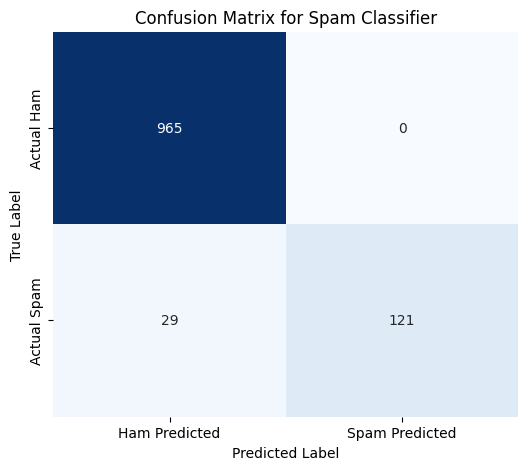


Model evaluation complete!


In [30]:
# Make predictions on the test set
# The .predict() method uses the trained model to predict labels for the unseen features (X_test).
y_pred = model.predict(X_test)

print("Predictions made on the test set.")

# --- Evaluate the Model's Performance ---

# 1. Accuracy Score: Overall correct predictions
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

# 2. Precision Score: Out of all predicted spam, how many were actually spam?
#    High precision means fewer legitimate emails are wrongly flagged as spam (False Positives).
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# 3. Recall Score: Out of all actual spam emails, how many did the model correctly identify?
#    High recall means fewer spam emails slip through (False Negatives).
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# 4. F1-Score: The harmonic mean of Precision and Recall. Useful when you need a balance.
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.4f}")

# 5. Confusion Matrix: A detailed breakdown of correct and incorrect predictions.
#    It shows True Positives, True Negatives, False Positives, False Negatives.
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Visualize the Confusion Matrix for better understanding
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Ham Predicted', 'Spam Predicted'],
            yticklabels=['Actual Ham', 'Actual Spam'])
plt.title('Confusion Matrix for Spam Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("\nModel evaluation complete!")

### What this cell does:

This cell evaluates the performance of our trained model. It uses the model to make predictions on the unseen test data and then calculates various metrics (Accuracy, Precision, Recall, F1-Score) and displays a Confusion Matrix to give us a comprehensive understanding of how well the model classifies emails.

#### How it works & Which libraries do what:

* **`y_pred = model.predict(X_test)`**:
    * **Scikit-learn (Model method)**: Uses the `predict()` method of our trained `model` to generate predictions (`y_pred`) for the `X_test` (the features of emails the model has never seen). These predictions will be either 0 (ham) or 1 (spam).
* **`accuracy_score(y_test, y_pred)`**:
    * **Scikit-learn (Metrics)**: Calculates the overall proportion of correct predictions (both ham and spam) out of all predictions made.
* **`precision_score(y_test, y_pred)`**:
    * **Scikit-learn (Metrics)**: Focuses on the *predicted positive* (spam) class. It tells us: "Out of all the emails the model *predicted* as spam, what percentage were *actually* spam?" High precision reduces "False Positives" (legitimate emails wrongly marked as spam).
* **`recall_score(y_test, y_pred)`**:
    * **Scikit-learn (Metrics)**: Focuses on the *actual positive* (spam) class. It tells us: "Out of all the emails that were *actually* spam, what percentage did the model correctly identify?" High recall reduces "False Negatives" (spam emails that slip through).
* **`f1_score(y_test, y_pred)`**:
    * **Scikit-learn (Metrics)**: The harmonic mean of precision and recall. It provides a single score that balances both metrics, especially useful for datasets where one class is much more frequent than the other (like ham vs. spam).
* **`cm = confusion_matrix(y_test, y_pred)`**:
    * **Scikit-learn (Metrics)**: Creates a confusion matrix, a table that summarizes the performance of a classification model.
        * It shows True Positives (correctly identified spam), True Negatives (correctly identified ham), False Positives (ham incorrectly identified as spam), and False Negatives (spam incorrectly identified as ham).
* **`sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ...)`**:
    * **Seaborn (`sns`)**: Used to create a heatmap visualization of the `confusion_matrix`.
    * **Matplotlib (`plt`)**: Works in conjunction with Seaborn to display the plot.
    * **Why visualize?**: The heatmap makes it much easier to visually interpret the numbers in the confusion matrix and understand where your model is making errors.

In [31]:
# Function to predict if a new message is spam or ham
def predict_spam_or_ham(message):
    # 1. Preprocess the new message using the same function
    cleaned_message = preprocess_text(message)

    # 2. Transform the cleaned message using the SAME TF-IDF vectorizer
    #    It's crucial to use the already fitted tfidf_vectorizer
    vectorized_message = tfidf_vectorizer.transform([cleaned_message])

    # 3. Make prediction using the trained model
    prediction = model.predict(vectorized_message)
    prediction_proba = model.predict_proba(vectorized_message) # Get probabilities

    # 4. Interpret the prediction
    if prediction[0] == 1:
        result = "SPAM"
        confidence = prediction_proba[0][1] # Probability of being spam
    else:
        result = "HAM"
        confidence = prediction_proba[0][0] # Probability of being ham

    print(f"\nOriginal Message: '{message}'")
    print(f"Cleaned Message:  '{cleaned_message}'")
    print(f"Prediction: This message is likely {result} (Confidence: {confidence:.2f})")

# --- Test with some example messages ---

# Example 1: A clear spam message
spam_example = "Free entry to a contest to win cash! text won to 87121 to claim now. This is a one time offer. claim your prize today."
predict_spam_or_ham(spam_example)

# Example 2: A clear ham message
ham_example = "Hey, can we meet tomorrow for lunch at 1 PM? Let me know if that works for you."
predict_spam_or_ham(ham_example)

# Example 3: Another potential spam message
spam_example_2 = "URGENT! You have won a £1000 prize guaranteed. Call 09061701461. Claim code KL65."
predict_spam_or_ham(spam_example_2)

# Example 4: Another ham message with some numbers
ham_example_2 = "My order number is 78901. It was placed on 23/10/2024. Can you check its status?"
predict_spam_or_ham(ham_example_2)

# Example 5: A tricky one (you can modify and test)
tricky_message = "Your account has been suspended due to unusual activity. Please verify your details at http://some-malicious-link.com now to avoid deactivation."
predict_spam_or_ham(tricky_message)


Original Message: 'Free entry to a contest to win cash! text won to 87121 to claim now. This is a one time offer. claim your prize today.'
Cleaned Message:  'free entri contest win cash text number claim one time offer claim prize today'
Prediction: This message is likely SPAM (Confidence: 0.95)

Original Message: 'Hey, can we meet tomorrow for lunch at 1 PM? Let me know if that works for you.'
Cleaned Message:  'hey meet tomorrow lunch number pm let know work'
Prediction: This message is likely HAM (Confidence: 1.00)

Original Message: 'URGENT! You have won a £1000 prize guaranteed. Call 09061701461. Claim code KL65.'
Cleaned Message:  'urgent £ number prize guarante call number claim code kl number'
Prediction: This message is likely SPAM (Confidence: 0.99)

Original Message: 'My order number is 78901. It was placed on 23/10/2024. Can you check its status?'
Cleaned Message:  'order number number place number number number check statu'
Prediction: This message is likely HAM (Confiden

### What this cell does:

This final cell demonstrates how to use your trained spam classifier model to predict whether new, unseen messages are "spam" or "ham" in a real-world scenario.

#### How it works & Which libraries do what:

* **`def predict_spam_or_ham(message):`**: Defines a reusable Python function to encapsulate the prediction process for any given message string.
* **`cleaned_message = preprocess_text(message)`**:
    * **Custom Function**: Calls the `preprocess_text` function (defined in Code Cell 4) to apply all the same cleaning steps (lowercasing, removing URLs, numbers, punctuation, stop words, stemming) to the new input message.
    * **Why?**: It's absolutely critical to apply the *exact same* preprocessing steps to new data as were applied to the training data. The model was trained on cleaned text, so it expects cleaned text.
* **`vectorized_message = tfidf_vectorizer.transform([cleaned_message])`**:
    * **Scikit-learn (`TfidfVectorizer` method)**: Uses the *already fitted* `tfidf_vectorizer` (the one that learned the vocabulary from your training data) to transform the *single* `cleaned_message` into its TF-IDF numerical vector representation.
    * **Important**: We use `transform()` here, not `fit_transform()`, because the vectorizer has already "learned" its vocabulary. We pass `[cleaned_message]` as a list because the `transform` method expects an iterable (even for a single item).
* **`prediction = model.predict(vectorized_message)`**:
    * **Scikit-learn (Model method)**: The trained `model` (Multinomial Naive Bayes) takes the `vectorized_message` as input and outputs its prediction (0 for ham, 1 for spam).
* **`prediction_proba = model.predict_proba(vectorized_message)`**:
    * **Scikit-learn (Model method)**: For models that support it (like Naive Bayes), `predict_proba` returns the probability of the input belonging to each class. This gives us a "confidence" score for the prediction.
* **`if prediction[0] == 1:` ... `else:`**: Interprets the numerical prediction (0 or 1) into human-readable "SPAM" or "HAM" and displays the associated confidence.